# 1. Introduction

## 1.1. Importance of breast cancer pre-detection
  #### In recent years, rapid population growth has made early detection of diseases an important issue in medical research. Early detection of breast cancer (BC), in particular, facilitates timely clinical treatment of patients and greatly improves prognosis and survival chances. More accurate classification of benign tumors can prevent patients from receiving unnecessary treatment. In medical section, it is highly probable that small amount of annotated data would be an obstacle for establishing the systematic solution for prognosis. Semi-supervised learning (SSL) algorithms provide an efficient way to leverage both labeled and unlabeled data suggesting the solution for the scarcity of labeled data. In this paper, basic concept of LabelPropagation model will be explained as a representative method of semi-supervised learning. Afterwards, compare prediction accuracy of three method implementations using benchmark dataset: supervised learning, non-transductive semi-supervised learning, and transductive semi-supervised learning. Through this comparision result, we'll be able to get an insight for choosing proper method according to the labeled data size. Additionally, in contrast to the label propagation model whose clamping factor is fixed (which means the original grounded truth never change), accuracy over clamping factor will be measured with the label spreading model. Primary data used in this paper comes from the Wisconsin Breast Cancer Database (WBCD), as a benchmark database to compare the results of different algorithms. 

## 1.2. Related works
  #### Dealing with the lack of labeled data, Graph-based Semi-Supervised Learning has been commonly used to predict the label of unlabeled observations, so called 'transductive learning'. In constructing a graph for this transductive learning, getting the similarity weight between the nodes is important so that there are several ways to get it. One of the representative ways among them is 'k-nearest-neighbor graph' and another one is 'RBF kernel method'  

## 1.3 What is your contributions ?
  #### Seems like few articles are found which handles the estimation and difference of existing SSL method using test dataset. For those who are new to semi-supervised learning, this estimation work would be helpful to catch the core idea of existing method implemented in a framework.

## 1.4 What we're going to do
  #### basic concept of LabelPropagation model will be explained as a representative method of semi-supervised learning. Afterwards, compare prediction accuracy of three method implementations using benchmark dataset: supervised learning, non-transductive semi-supervised learning, and transductive semi-supervised learning. Supervised learning method will be implemented using LogisticRegression model. Non-transductive and transductive model will be implemented using label propagation model of sklearn library. Through this comparision result, we'll be able to get an insight for choosing proper method according to the labeled data size. Additionally, in contrast to the label propagation model whose clamping factor is fixed (which means the original grounded truth never change), accuracy over clamping factor will be measured with the label spreading model. Primary data used in this paper comes from the Wisconsin Breast Cancer Database (WBCD), as a benchmark database to compare the results of different algorithms.


# 2. Main Part Components

## 1. Dataset features (breast cancer)
## 2. Label Propagation Algorithm (figure & explanation)

  ### **Label Propagation vs. Label Spreading**
  #### Label Propagation uses hard clamping, which means that the labels of the originally labeled points never change.

  #### Meanwhile, Label Spreading adopts soft clamping controlled through a hyperparameter α (alpha), which specifies the relative amount of information the point obtains from its neighbors vs. its initial label information. In this paper, we assume that the weight of the true ground labeled data is cautiously checked so that there's no error 

  ### **How Label Propagation Algorithm works**
  #### In this paper, we don't focus on the detailed mechanism of the label propagation algorithm, but just the abstract concept of how it works.

  #### The algorithm follows an iterative approach, which we can describe as a collection of the following steps:
  #### 1. Create a connected graph by drawing edges (links) between different nodes (data points). Note that creating a fully connected graph on a large dataset may demand a high amount of resources from your machine. Hence, it is often beneficial to limit the number of neighbors that you want to join together (see n_neighbors in the Python example section).
  #### 2. Determine the weights for each edge, where edges for closer data points have larger weights (stronger connection), and edges for faraway points have smaller weights (weaker connection). Larger edge weights allow labels to travel through easier, increasing the probability of propagating the particular label.
  #### 3. Perform a random walk from each unlabeled point to find a probability distribution of reaching a labeled one. This random walk consists of many iterations and continues until convergence is reached, i.e., all paths have been explored, and probabilities no longer change.
  #### Unlabeled points get their new labels assigned based on the probabilities found by the process above. Note that original labeled points never change since their labels are clamped (fixed).


3. Estimating Label Spreading accuracy as clamping value changes
4. Preprocessing data for LabelPropagation unlabeled data 
   (code blocks & diagram)
5. Prediction Result (0.20 ~ 0.80)
6. Table (same content with the number 3)


# Baseline Performance (Supervised Learning)

In [63]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

def baseline_supervised(train_size=0.50):
  # define dataset
  X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=None)
  # split into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.50, random_state=None, stratify=y)
  # split train into labeled and unlabeled
  X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, train_size=train_size, random_state=None, stratify=y_train)

  # define model
  model = LogisticRegression()
  # fit model on labeled dataset
  model.fit(X_train_lab, y_train_lab)
  # make predictions on hold out test set

  yhat = model.predict(X_test)
  # calculate score for test set
  score = accuracy_score(y_test, yhat)
  # summarize score
  # print('Supervised(BaseLine) - Accuracy: %.3f' % (score*100), end=' ')
  return round(score*100, 3)

In [52]:
print(baseline_supervised(0.5))

89.4


# Semi-Supervised Learning Performance (non-transductive)

In [ ]:
from sklearn.semi_supervised import LabelPropagation

In [113]:
def label_propagation_non_trans(train_size=0.50, max_iter=3000):
  # define dataset
  X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=None)
  # split into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=None, stratify=y)
  # split train into labeled and unlabeled
  X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, train_size=train_size, random_state=None, stratify=y_train)

  # create the training dataset input
  X_train_mixed = concatenate((X_train_lab, X_test_unlab))
  # create "no label" for unlabeled data
  nolabel = [-1 for _ in range(len(y_test_unlab))]
  # recombine training dataset labels
  y_train_mixed = concatenate((y_train_lab, nolabel))

  # define model
  model = LabelPropagation(max_iter=max_iter)
  # fit model on training dataset
  model.fit(X_train_mixed, y_train_mixed)

  # make predictions on hold out test set
  yhat = model.predict(X_test)
  # calculate score for test set
  score = accuracy_score(y_test, yhat)
  # summarize score
  # print('Semi-Supervised(non-transductive) - Accuracy: %.3f' % (score*100), end=' ')
  return round(score*100, 3)

In [55]:
print(semi_supervised_non_transductive(0.5, 1000))

97.4


# Semi-Supervised Learning Performance (transductive)

In [ ]:
# evaluate label propagation on the semi-supervised learning dataset
from numpy import concatenate
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.semi_supervised import LabelPropagation

In [107]:
def label_propagation_trans(train_size=0.50, max_iter=3000):
  # define dataset
  X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=None)
  # split into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=None, stratify=y)
  # split train into labeled and unlabeled
  X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, train_size=train_size, random_state=None, stratify=y_train)

  # create the training dataset input
  X_train_mixed = concatenate((X_train_lab, X_test_unlab))
  # create "no label" for unlabeled data
  nolabel = [-1 for _ in range(len(y_test_unlab))]
  # recombine training dataset labels
  y_train_mixed = concatenate((y_train_lab, nolabel))

  # define model
  model = LabelPropagation(max_iter=max_iter)
  # fit model on training dataset
  model.fit(X_train_mixed, y_train_mixed)

  # get labels for entire training dataset data
  tran_labels = model.transduction_

  # define supervised learning model
  model2 = LabelPropagation(max_iter=max_iter)
  # fit supervised learning model on entire training dataset
  model2.fit(X_train_mixed, tran_labels)
  # make predictions on hold out test set
  yhat = model2.predict(X_test)
  # calculate score for test set
  score = accuracy_score(y_test, yhat)
  # summarize score
  # print('Semi-Supervised(transductive) - Accuracy: %.3f' % (score*100))
  return round(score*100, 3)

In [61]:
semi_supervised_transductive(train_size=0.5, max_iter=1000)

94.2

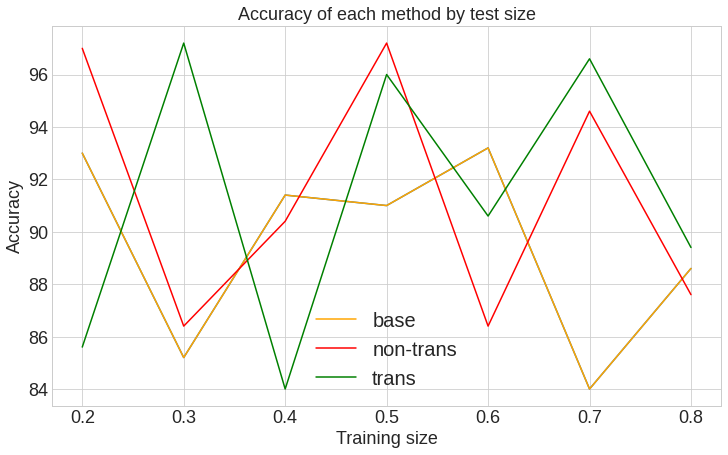

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import numpy as np


test_sizes = [0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80]
base_list, non_trans_list, trans_list = [], [], []
for test_size in [0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80]:
  base = baseline_supervised(test_size)
  non_trans = semi_supervised_non_transductive(test_size, 3000)
  trans = semi_supervised_transductive(test_size, 3000)
  base_list.append(base)
  non_trans_list.append(non_trans)
  trans_list.append(trans)

fig = plt.figure(figsize = (12, 7))
ax = plt.axes()
ax.plot(test_sizes, base_list)

parameters = {'axes.labelsize': 18,
          'axes.titlesize': 18,
          'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'legend.fontsize': 20}
plt.rcParams.update(parameters)
plt.title('Accuracy of each method by test size')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.plot(test_sizes, base_list, label='base', color='orange')
plt.plot(test_sizes, non_trans_list, label='non-trans', color='red')
plt.plot(test_sizes, trans_list, label='trans', color='green')

plt.legend()

# partial codes (BaseLine - Supervised)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=1)
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)

In [ ]:
# define model
model = LogisticRegression()
# fit model on labeled dataset
model.fit(X_train_lab, y_train_lab)
# make predictions on hold out test set

LogisticRegression()

In [ ]:
yhat = model.predict(X_test)
# calculate score for test set
score = accuracy_score(y_test, yhat)
# summarize score
print('Accuracy: %.3f' % (score*100))

Accuracy: 84.800


# partial codes (Semi-Supervised, non-transductive)

In [ ]:
# evaluate label propagation on the semi-supervised learning dataset
from numpy import concatenate
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.semi_supervised import LabelPropagation

In [ ]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=1)
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)
# split train into labeled and unlabeled
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, test_size=0.50, random_state=1, stratify=y_train)

In [ ]:
# create the training dataset input
X_train_mixed = concatenate((X_train_lab, X_test_unlab))
# create "no label" for unlabeled data
nolabel = [-1 for _ in range(len(y_test_unlab))]
# recombine training dataset labels
y_train_mixed = concatenate((y_train_lab, nolabel))

In [ ]:
# define model
model = LabelPropagation()
# fit model on training dataset
model.fit(X_train_mixed, y_train_mixed)

LabelPropagation()

In [ ]:
# make predictions on hold out test set
yhat = model.predict(X_test)
# calculate score for test set
score = accuracy_score(y_test, yhat)
# summarize score
print('Accuracy: %.3f' % (score*100))

Accuracy: 85.600


# partial codes (Semi-Supervised, transductive)

In [ ]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=1)
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)
# split train into labeled and unlabeled
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, test_size=0.50, random_state=1, stratify=y_train)

In [ ]:
# create the training dataset input
X_train_mixed = concatenate((X_train_lab, X_test_unlab))
# create "no label" for unlabeled data
nolabel = [-1 for _ in range(len(y_test_unlab))]
# recombine training dataset labels
y_train_mixed = concatenate((y_train_lab, nolabel))

In [ ]:
# define model
model = LabelPropagation()
# fit model on training dataset
model.fit(X_train_mixed, y_train_mixed)

LabelPropagation()

In [ ]:
# get labels for entire training dataset data
tran_labels = model.transduction_

In [ ]:
# define supervised learning model
model2 = LogisticRegression()
# fit supervised learning model on entire training dataset
model2.fit(X_train_mixed, tran_labels)
# make predictions on hold out test set
yhat = model2.predict(X_test)
# calculate score for test set
score = accuracy_score(y_test, yhat)
# summarize score
print('Accuracy: %.3f' % (score*100))

Accuracy: 86.200


# Label Spreading

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from numpy import concatenate
from sklearn.semi_supervised import LabelSpreading

In [109]:
def label_spreading_non_trans(kernel='rbf', train_size=0.50, alpha=0.0, gamma=20, max_iter=3000):
  # define dataset
  X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=None)
  # split into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=None, stratify=y)
  # split train into labeled and unlabeled
  X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, train_size=train_size, random_state=None, stratify=y_train)

  # create the training dataset input
  X_train_mixed = concatenate((X_train_lab, X_test_unlab))
  # create "no label" for unlabeled data
  nolabel = [-1 for _ in range(len(y_test_unlab))]
  # recombine training dataset labels
  y_train_mixed = concatenate((y_train_lab, nolabel))

  # define model
  model = LabelSpreading(max_iter=max_iter)
  # fit model on training dataset
  model.fit(X_train_mixed, y_train_mixed)

  # make predictions on hold out test set
  yhat = model.predict(X_test)
  # calculate score for test set
  score = accuracy_score(y_test, yhat)
  # summarize score
  return round(score*100, 3)

In [110]:
def label_spreading_trans(kernel='rbf', train_size=0.50, alpha=0.0, gamma=20, max_iter=3000):
  # define dataset
  X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=None)
  # split into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=None, stratify=y)
  # split train into labeled and unlabeled
  X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, train_size=train_size, random_state=None, stratify=y_train)

  # create the training dataset input
  X_train_mixed = concatenate((X_train_lab, X_test_unlab))
  # create "no label" for unlabeled data
  nolabel = [-1 for _ in range(len(y_test_unlab))]
  # recombine training dataset labels
  y_train_mixed = concatenate((y_train_lab, nolabel))

  # define model
  model = LabelSpreading(max_iter=max_iter)
  # fit model on training dataset
  model.fit(X_train_mixed, y_train_mixed)

  # get labels for entire training dataset data
  tran_labels = model.transduction_

  # define supervised learning model
  model2 = LabelSpreading(max_iter=max_iter)
  # fit supervised learning model on entire training dataset
  model2.fit(X_train_mixed, tran_labels)
  # make predictions on hold out test set
  yhat = model2.predict(X_test)
  # calculate score for test set
  score = accuracy_score(y_test, yhat)
  # summarize score
  # print('Semi-Supervised(transductive) - Accuracy: %.3f' % (score*100))
  return round(score*100, 3)

In [ ]:
import numpy as np

# for cf in range(0, 11, 1):
  # print(label_spreading(0.5, cf * 0.1, 1000))

# gamma_set = []
# for gamma in range(20, 200, 10):
#   result = label_spreading(kernel='knn', train_size=0.20, alpha=0.2, gamma=gamma, max_iter=3000)
#   print(result)

repeat = 100
train_sizes = [0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80]
ls_non_trans_list = []
ls_trans_list = []
for train_size in train_sizes:
  tmp_non_trans = [label_spreading_non_trans(train_size=train_size, alpha=0.2, max_iter=3000) for _ in range(repeat)]
  tmp_trans = [label_spreading_trans(train_size=train_size, alpha=0.2, max_iter=3000) for _ in range(repeat)]
  ls_non_trans_list.append(round(np.mean(tmp_non_trans), 3))
  ls_trans_list.append(round(np.mean(tmp_trans), 3))

print(*ls_non_trans_list, sep=' ')
print(*ls_trans_list, sep=' ')

# non_trans_list = []
# for train_size in train_sizes:
#   non_trans = semi_supervised_non_transductive(train_size, 3000)
#   non_trans_list.append(non_trans)

# print(*non_trans_list, sep=' ')

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import numpy as np


train_sizes = [0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80]
base_list, non_trans_list, trans_list = [], [], []
repeat = 10
for train_size in train_sizes:
  tmp_base = [baseline_supervised(train_size=train_size) for _ in range(repeat)]
  tmp_non_trans = [label_propagation_non_trans(train_size, 3000) for _ in range(repeat)]
  tmp_trans = [label_propagation_trans(train_size, 3000) for _ in range(repeat)]

  base_list.append(round(np.mean(tmp_base), 3))
  non_trans_list.append(round(np.mean(tmp_non_trans), 3))
  trans_list.append(round(np.mean(tmp_trans), 3))

print(*base_list, sep=' ')
print(*non_trans_list, sep=' ')
print(*trans_list, sep=' ')

# fig = plt.figure(figsize = (12, 7))
# ax = plt.axes()
# ax.plot(test_sizes, base_list)

# parameters = {'axes.labelsize': 18,
#           'axes.titlesize': 18,
#           'xtick.labelsize': 18,
#           'ytick.labelsize': 18,
#           'legend.fontsize': 20}
# plt.rcParams.update(parameters)
# plt.title('Accuracy of each method by test size')
# plt.xlabel('Training size')
# plt.ylabel('Accuracy')
# plt.plot(test_sizes, base_list, label='base', color='orange')
# plt.plot(test_sizes, non_trans_list, label='non-trans', color='red')
# plt.plot(test_sizes, trans_list, label='trans', color='green')

# plt.legend()

90.028 89.668 90.132 89.908 90.116 91.012 90.584
90.784 91.496 91.992 93.396 92.52 92.688 93.16
92.228 92.516 91.852 92.368 93.276 93.052 93.0


# Comparison 1 
# Base (Supervised) <-> LP-non-trans <-> LP-trans


90.326 90.256 89.86 90.402 89.994 90.472 90.4
92.302 92.158 92.822 93.038 92.344 93.002 93.418
91.904 92.212 92.646 93.284 92.632 92.898 92.726


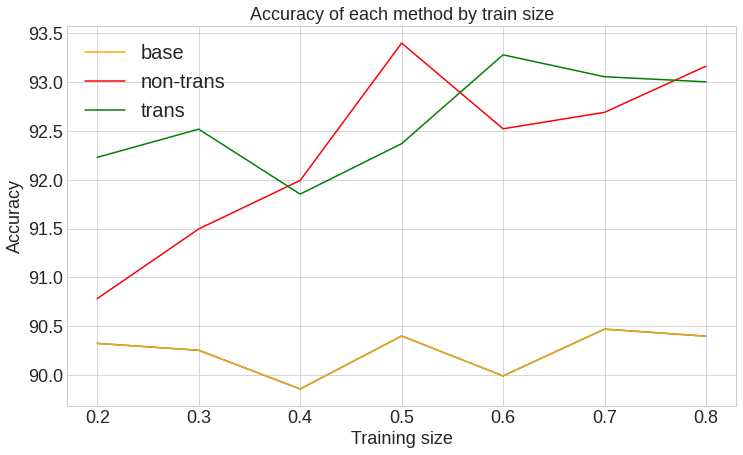

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import numpy as np


train_sizes = [0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80]
base_list, lp_non_trans_list, lp_trans_list = [], [], []

repeat = 100
for train_size in train_sizes:
  base = [baseline_supervised(train_size) for _ in range(repeat)]
  non_trans = [label_propagation_non_trans(train_size, 3000) for _ in range(repeat)]
  trans = [label_propagation_trans(train_size, 3000) for _ in range(repeat)]

  base_list.append(round(np.mean(base), 3))
  lp_non_trans_list.append(round(np.mean(non_trans), 3))
  lp_trans_list.append(round(np.mean(trans), 3))

print(*base_list, sep=' ')
print(*lp_non_trans_list, sep=' ')
print(*lp_trans_list, sep=' ')


fig = plt.figure(figsize = (12, 7))
ax = plt.axes()
ax.plot(test_sizes, base_list)

parameters = {'axes.labelsize': 18,
          'axes.titlesize': 18,
          'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'legend.fontsize': 20}
plt.rcParams.update(parameters)
plt.title('Accuracy of each method by train size')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.plot(test_sizes, base_list, label='base', color='orange')
plt.plot(test_sizes, non_trans_list, label='non-trans', color='red')
plt.plot(test_sizes, trans_list, label='trans', color='green')

plt.legend()

# Comparison 2
## LP trans <-> LS trans


91.942 92.584 92.552 92.336 92.446 92.998 92.758
91.028 92.246 92.57 92.412 93.732 92.782 93.006


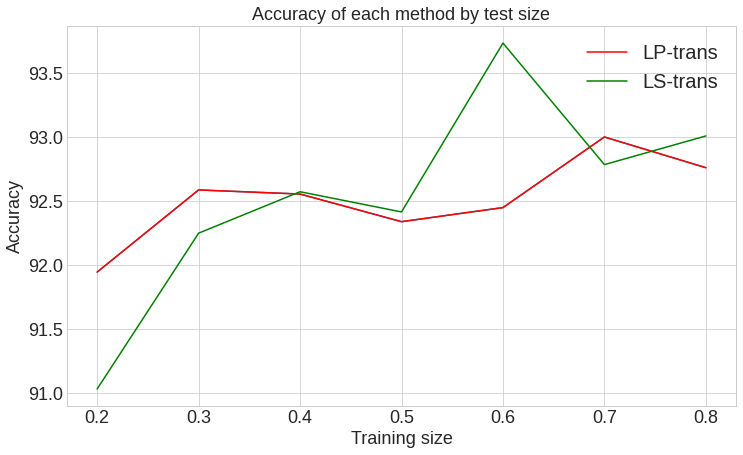

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import numpy as np


train_sizes = [0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80]
lp_trans_list, ls_trans_list = [], []
repeat = 100
for train_size in train_sizes:
  tmp_lp_trans = [label_propagation_trans(train_size=train_size) for _ in range(repeat)]
  tmp_ls_trans = [label_spreading_trans(train_size=train_size) for _ in range(repeat)]

  lp_trans_list.append(round(np.mean(tmp_lp_trans), 3))
  ls_trans_list.append(round(np.mean(tmp_ls_trans), 3))

print(*lp_trans_list, sep=' ')
print(*ls_trans_list, sep=' ')

fig = plt.figure(figsize = (12, 7))
ax = plt.axes()
ax.plot(train_sizes, lp_trans_list)

parameters = {'axes.labelsize': 18,
          'axes.titlesize': 18,
          'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'legend.fontsize': 20}
plt.rcParams.update(parameters)
plt.title('Accuracy of each method by test size')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.plot(train_sizes, lp_trans_list, label='LP-trans', color='red')
plt.plot(train_sizes, ls_trans_list, label='LS-trans', color='green')

plt.legend()

# Comparison 3
## LP non-trans <-> LS non-trans

92.438 92.364 92.554 92.434 93.794 92.732 93.084
91.434 92.412 92.574 92.934 92.558 92.852 93.496


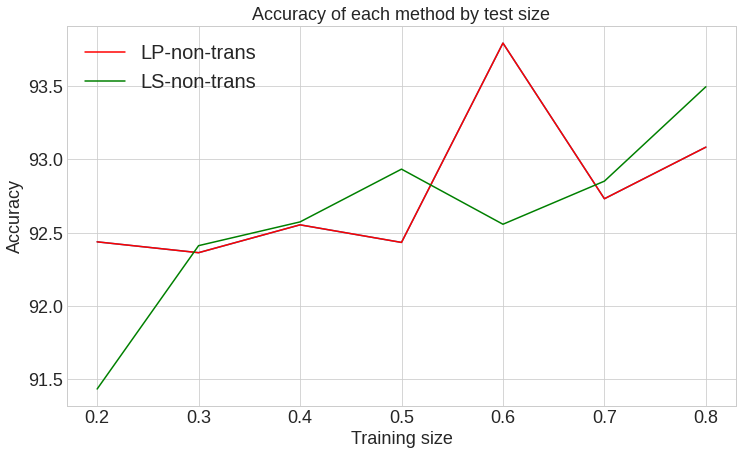

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import numpy as np


train_sizes = [0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80]
lp_non_trans_list, ls_non_trans_list = [], []
repeat = 100
for train_size in train_sizes:
  tmp_lp_non_trans = [label_propagation_non_trans(train_size=train_size) for _ in range(repeat)]
  tmp_ls_non_trans = [label_spreading_non_trans(train_size=train_size) for _ in range(repeat)]

  lp_non_trans_list.append(round(np.mean(tmp_lp_non_trans), 3))
  ls_non_trans_list.append(round(np.mean(tmp_ls_non_trans), 3))

print(*lp_non_trans_list, sep=' ')
print(*ls_non_trans_list, sep=' ')

fig = plt.figure(figsize = (12, 7))
ax = plt.axes()
ax.plot(train_sizes, lp_non_trans_list)

parameters = {'axes.labelsize': 18,
          'axes.titlesize': 18,
          'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'legend.fontsize': 20}
plt.rcParams.update(parameters)
plt.title('Accuracy of each method by test size')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.plot(train_sizes, lp_non_trans_list, label='LP-non-trans', color='red')
plt.plot(train_sizes, ls_non_trans_list, label='LS-non-trans', color='green')

plt.legend()